In [22]:
import pandahouse
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [23]:
connection = {
    'host': '_',
    'password': '_',
    'user': '_',
    'database': '_'
}


q = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM {db}.feed_actions 
WHERE toDate(time) between '2022-04-17' and '2022-04-23'
    and exp_group in (2,3)
GROUP BY exp_group, user_id
"""

df = pandahouse.read_clickhouse(q, connection=connection)

df.groupby('exp_group').count()

user_id  likes  views   ctr
exp_group                             
2             8480   8480   8480  8480
3             8569   8569   8569  8569

In [24]:
stats.ttest_ind(df[df.exp_group == 2].ctr,
                df[df.exp_group == 3].ctr,
                equal_var=False)

Ttest_indResult(statistic=-0.7393597924958364, pvalue=0.45969873156476293)

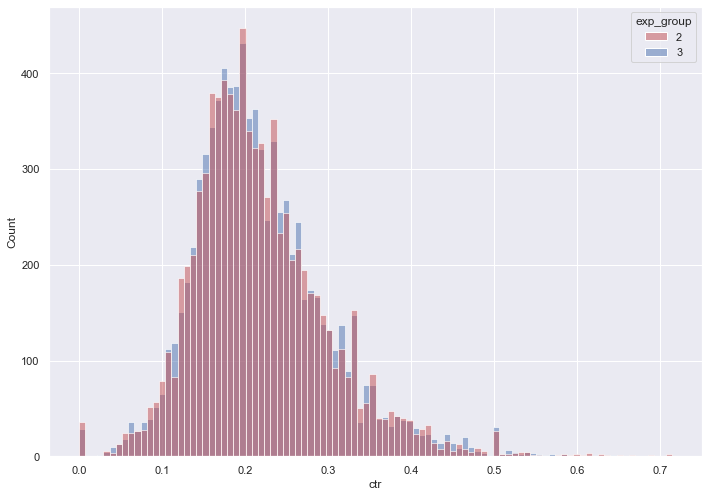

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

groups = sns.histplot(data = df, 
              x='ctr', 
              hue='exp_group', 
              palette = ['r', 'b'],
              alpha=0.5,
              kde=False)

In [26]:
p_list = []
for i in range(10000):
    gr_2 = df[df.exp_group == 2].ctr.sample(500, replace = True).to_list()
    gr_3 = df[df.exp_group == 3].ctr.sample(500, replace = True).to_list()
    ttest = stats.ttest_ind(gr_2,
                gr_3,
                equal_var=False)
    p_list.append(ttest.pvalue)

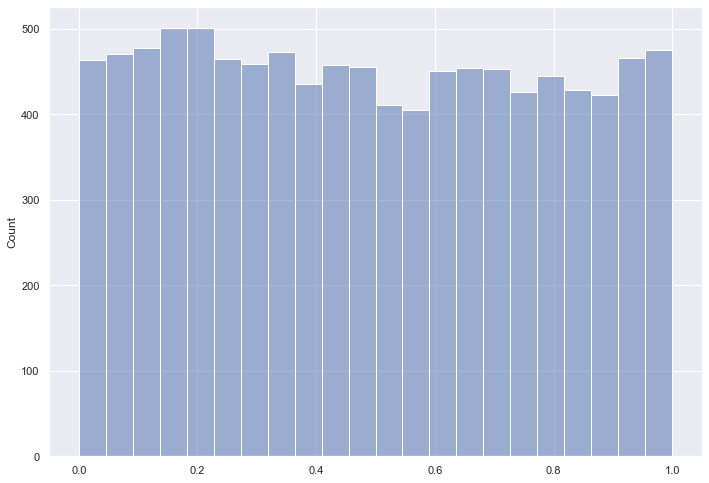

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

groups = sns.histplot( 
              x=p_list, 
              palette = ['r', 'b'],
              alpha=0.5,
              kde=False)

In [28]:
ss = pd.Series(p_list)
ss[ss<0.05].count()/10000

0.052

Проведённый АА-тест показал, что система сплитования работает корректно - около 5% тестов показали p-value ниже 0.05